Import dataset and required columns

In [54]:
import pandas as pd
data = pd.read_excel('customer_churn_data.xlsx')
data = data.iloc[:, 1:-3]
data.head()

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44.00,No
1,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No
2,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.40,Yes
3,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.90,No
4,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.80,No


Description of the dataset

In [55]:
dimensions = data.shape
print(f"Dimensions of the dataset: {dimensions[0]} rows, {dimensions[1]} columns")
data_types = data.dtypes
print("Data types of each column:")
print(data_types)

Dimensions of the dataset: 999 rows, 19 columns
Data types of each column:
Gender                            object
Senior Citizen                     int64
Marital Status                    object
Dependents                        object
tenure in months                 float64
Priority Account                  object
Credit Cards                      object
Loan Account                      object
Netbanking                        object
Debit Card                        object
MobileApp                         object
TechSupport Availed               object
Zero Balance Account              object
FDs                               object
Interest Deposited                object
Paperless Banking                 object
Monthly Average Balance (USD)    float64
Yearly Average Balance (USD)     float64
Churn                             object
dtype: object


Check for missing values

In [56]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       2
tenure in months                 5
Priority Account                 2
Credit Cards                     2
Loan Account                     1
Netbanking                       1
Debit Card                       0
MobileApp                        0
TechSupport Availed              1
Zero Balance Account             2
FDs                              4
Interest Deposited               0
Paperless Banking                2
Monthly Average Balance (USD)    4
Yearly Average Balance (USD)     7
Churn                            2
dtype: int64


Filling missing values of Dependents column

In [57]:
data['Dependents'].fillna(0, inplace=True)

Filling missing values of 'tenure' column

In [58]:
from scipy.stats import skew
skewness = skew(data['tenure in months'].dropna())
print(f'Skewness: {skewness}')


Skewness: 0.2573225604978173


In [59]:
mean_tenure = data['tenure in months'].mean()
data['tenure in months'].fillna(mean_tenure, inplace=True)

Handling the missing values in the 'Churn' column

In [60]:
data = data.dropna(subset=['Churn'])

Handling the missing values of 'Monthly Average Balance'

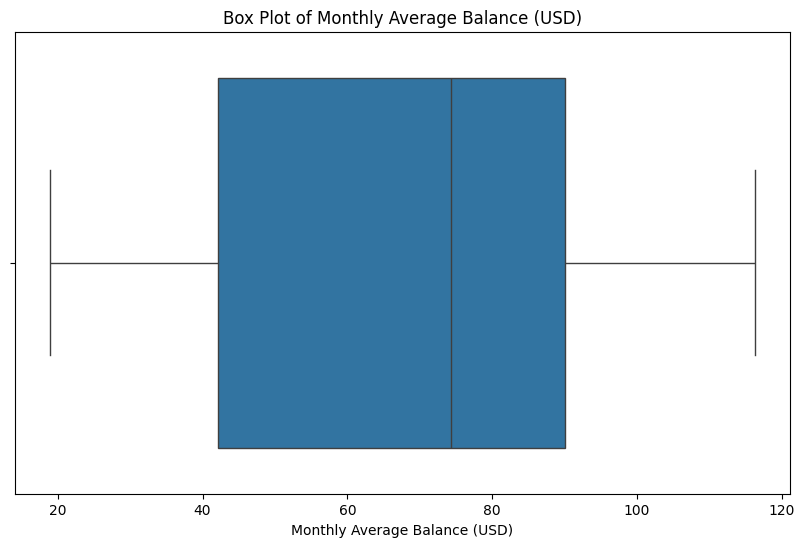

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'Monthly Average Balance (USD)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[column_name])
plt.title(f'Box Plot of {column_name}')
plt.xlabel(column_name)
plt.show()

In [62]:
mean_monthly_balance = data['Monthly Average Balance (USD)'].mean()
data['Monthly Average Balance (USD)'].fillna(mean_monthly_balance, inplace=True)

Handling the missing values of 'Yearly Average Balance'

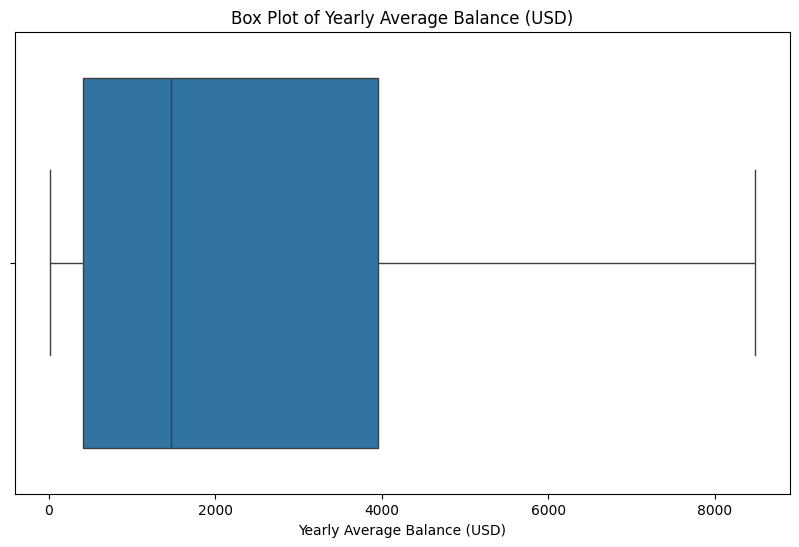

In [63]:
df_cleaned = data.dropna(subset=['Yearly Average Balance (USD)'])
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Yearly Average Balance (USD)'])
plt.title('Box Plot of Yearly Average Balance (USD)')
plt.xlabel('Yearly Average Balance (USD)')
plt.show()


In [64]:
median_yearly_balance = data['Monthly Average Balance (USD)'].median()
data['Yearly Average Balance (USD)'].fillna(median_yearly_balance, inplace=True)

FIlling all the remaining categorical missing values

In [65]:
columns_to_fill = [
    'Priority Account',
    'Credit Cards',
    'Loan Account',
    'Netbanking',
    'TechSupport Availed',
    'Zero Balance Account',
    'FDs',
    'Paperless Banking']

# Iterate over the columns and fill missing values with the mode
for column in columns_to_fill:
    mode_value = data[column].mode()[0]  # Compute the mode for the column
    data[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

In [66]:
data.head()

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44.00,No
1,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No
2,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.40,Yes
3,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.90,No
4,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.80,No


Encoding all categorical values

In [67]:
# Apply one-hot encoding to all non-numerical features
data = pd.get_dummies(data, columns=['Gender', 
                                     'Senior Citizen', 
                                     'Marital Status', 
                                     'Dependents', 
                                     'Priority Account', 
                                     'Credit Cards', 
                                     'Loan Account', 
                                     'Netbanking', 
                                     'Debit Card', 
                                     'MobileApp', 
                                     'TechSupport Availed', 
                                     'Zero Balance Account', 
                                     'FDs', 
                                     'Interest Deposited', 
                                     'Paperless Banking'])


Standardizing numerical values

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [69]:
data.head()

,tenure in months,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Gender_Female,Gender_Male,Senior Citizen_0,Senior Citizen_1,Marital Status_No,Marital Status_Yes,...,TechSupport Availed_Yes,Zero Balance Account_No,Zero Balance Account_Yes,FDs_No,FDs_Yes,Interest Deposited_Month-to-month,Interest Deposited_One year,Interest Deposited_Two year,Paperless Banking_No,Paperless Banking_Yes
0,-1.264384,-0.754352,-1.000227,No,False,True,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
1,1.607007,-0.057295,1.042491,No,False,True,True,False,False,True,...,True,False,True,False,True,False,False,True,False,True
2,-0.495984,0.924617,-0.240764,Yes,True,False,False,True,True,False,...,False,True,False,False,True,True,False,False,False,True
3,0.595954,-0.050593,0.238706,No,True,False,True,False,True,False,...,True,True,False,True,False,False,False,True,False,True
4,0.879049,1.259741,1.447059,No,True,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,True


RFE

In [70]:
X = data.drop(columns=['Churn'])
y = data['Churn']

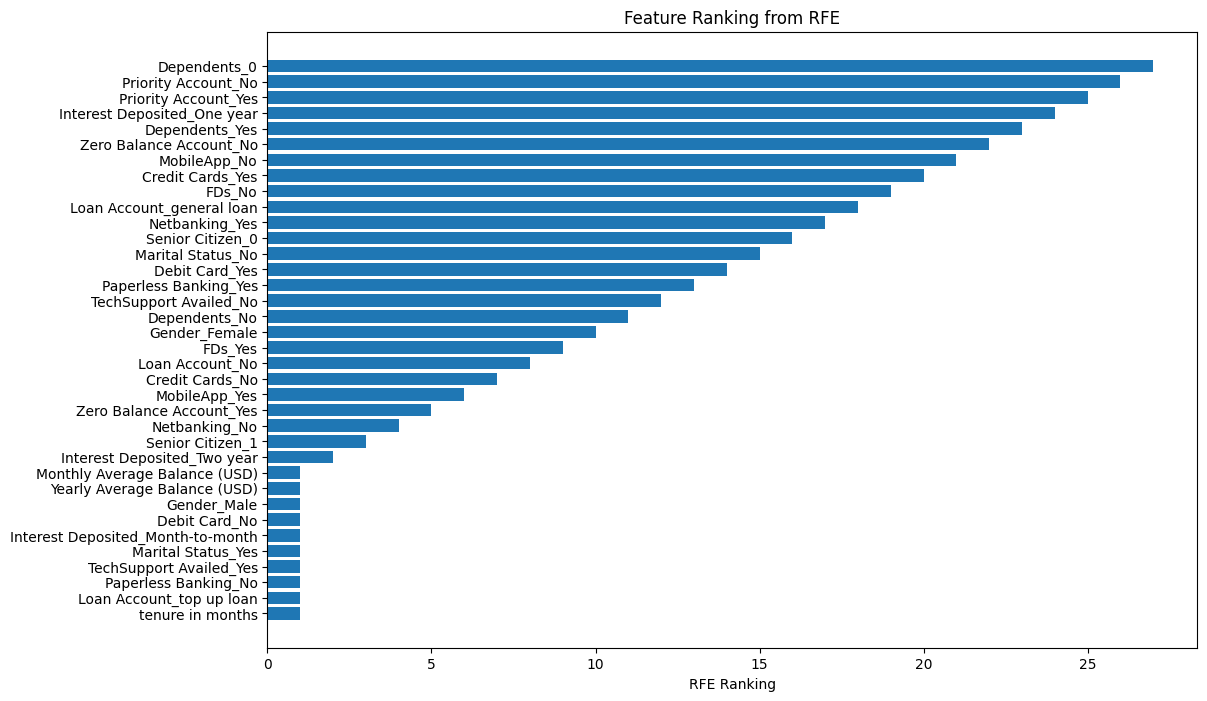

In [77]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Get rankings of features
ranking = rfe.ranking_
importance_df = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
importance_df = importance_df.sort_values(by='Ranking')

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Ranking'])
plt.xlabel('RFE Ranking')
plt.title('Feature Ranking from RFE')
plt.show()


Selecting features based on their RFE ranking

In [102]:
threshold = 10
selected_features = importance_df[importance_df['Ranking'] <= threshold]['Feature']

print(f"Selected Features (Ranking <= {threshold}):")
print(selected_features.tolist())

X_selected = X[selected_features]
len(selected_features)


Selected Features (Ranking <= 10):
['tenure in months', 'Loan Account_top up loan', 'Paperless Banking_No', 'TechSupport Availed_Yes', 'Marital Status_Yes', 'Interest Deposited_Month-to-month', 'Debit Card_No', 'Gender_Male', 'Yearly Average Balance (USD)', 'Monthly Average Balance (USD)', 'Interest Deposited_Two year', 'Senior Citizen_1', 'Netbanking_No', 'Zero Balance Account_Yes', 'MobileApp_Yes', 'Credit Cards_No', 'Loan Account_No', 'FDs_Yes', 'Gender_Female']


19

Split dataset for testing and training

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Random Forest Classifier model

Hyperparameter tuning using GridSearch

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_selected, y)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\elsaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
754 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elsaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elsaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\elsaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.820427135678392


Results of random forest classifier model with the best parameters

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

best_params = {
    'bootstrap': False,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100
}

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
print("\tBefore Hyperparameter Tuning")
print("Accuracy Score:", accuracy)
print("Precison Score:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

rf_clf_best = RandomForestClassifier(**best_params, random_state=42)

rf_clf_best.fit(X_train, y_train)

y_pred_best = rf_clf_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label='Yes')
print("\n\n\tAfter Hyperparameter Tuning")
print("Accuracy Score:", accuracy_best)
print("Precison Score:", precision_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


	Before Hyperparameter Tuning
Accuracy Score: 0.795
Precison Score: 0.5853658536585366

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.89      0.87       152
         Yes       0.59      0.50      0.54        48

    accuracy                           0.80       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.79      0.80      0.79       200


Confusion Matrix:
 [[135  17]
 [ 24  24]]


	After Hyperparameter Tuning
Accuracy Score: 0.805
Precison Score: 0.6046511627906976

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.89      0.87       152
         Yes       0.60      0.54      0.57        48

    accuracy                           0.81       200
   macro avg       0.73      0.71      0.72       200
weighted avg       0.80      0.81      0.80       200


Confusion Matrix:
 [[135  17]
 [ 22  26]]


Support Vector Machine model

Hyperparameter tuning using GridSearch

In [108]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],                   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],       # Kernel type
    'gamma': ['scale', 'auto']                 # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Initialize the SVC model
svc = SVC()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_selected, y)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.811391959798995


Results of SVM model with the best parameters

In [110]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
print("\tBefore Hyperparameter Tuning")
print("Accuracy Score:", accuracy)
print("Precison Score:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print(best_params)
best_params = grid_search.best_params_
svc_best = SVC(**best_params, random_state=42)
svc_best.fit(X_train, y_train)
y_pred_best = svc_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, pos_label='Yes')
print("\t\n\nAfter Hyperparameter Tuning")
print("Accuracy Score:", accuracy_best)
print("Precison Score:", precision_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


	Before Hyperparameter Tuning
Accuracy Score: 0.805
Precison Score: 0.6216216216216216

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.91      0.88       152
         Yes       0.62      0.48      0.54        48

    accuracy                           0.81       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.79      0.81      0.80       200


Confusion Matrix:
 [[138  14]
 [ 25  23]]
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
	

After Hyperparameter Tuning
Accuracy Score: 0.805
Precison Score: 0.6216216216216216

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.91      0.88       152
         Yes       0.62      0.48      0.54        48

    accuracy                           0.81       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.79      0.81      0.80       200


Confusion Matrix:
 [[138  14]
 [ 

In [111]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)